In [98]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [99]:
# format right at the beginning how to view the float type
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [100]:
processed_data_folder = '../processed_data_'

df_tesla = pd.read_parquet(os.path.join(processed_data_folder, 'tesla_results.parquet'))
df_stock = pd.read_parquet(os.path.join(processed_data_folder, 'tesla_stock.parquet'))

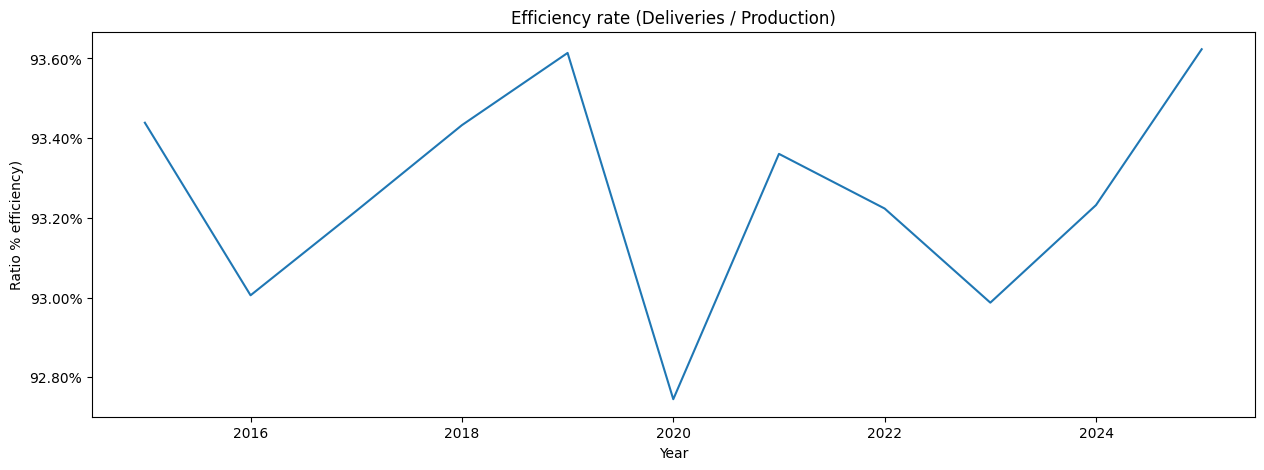

In [101]:
df_tesla['Year'] = df_tesla.index.year

df_tesla['Efficiency_ratio'] = df_tesla['Estimated_Deliveries'] / df_tesla['Production_Units']

plt.figure(figsize=(15,5))
ax = sns.lineplot(
    data=df_tesla,
    x='Year',
    y='Efficiency_ratio',
    errorbar=None
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ylabel('Ratio % efficiency)')
plt.title('Efficiency rate (Deliveries / Production)')
plt.show()

C:\Users\Thiag\AppData\Local\Temp\ipykernel_14932\169113070.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_yearly = df_tesla.groupby(['Year', 'Model'])['Production_Units'].sum().reset_index()


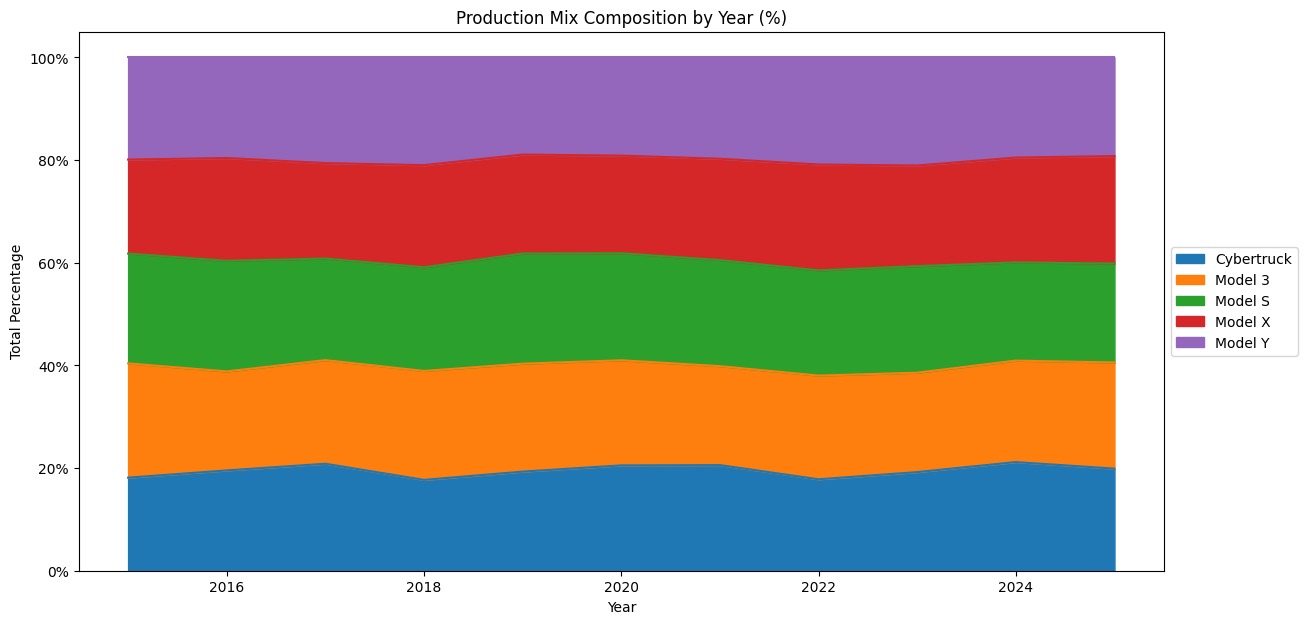

In [102]:
df_yearly = df_tesla.groupby(['Year', 'Model'])['Production_Units'].sum().reset_index()
df_pivot = df_yearly.pivot(index='Year', columns='Model', values='Production_Units').fillna(0)

df_percent = df_pivot.apply(lambda x: x / x.sum(), axis=1)

ax = df_percent.plot(
    kind='area', 
    stacked=True, 
    figsize=(14, 7), 
    title='Production Mix Composition by Year (%)'
)


ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylabel('Total Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [103]:
df_ops = df_tesla.sort_index()

df_ops['Year'] = df_ops.index.year
df_ops['Estimated_Revenue'] = df_ops['Estimated_Deliveries'] * df_ops['Avg_Price_USD']

# Aggregate by year
df_yearly_ops = df_ops.groupby('Year').agg(
    Deliveries_y=('Estimated_Deliveries', 'sum'),
    Production_y=('Production_Units', 'sum'),
    Revenue_y=('Estimated_Revenue', 'sum')
)

df_stock['Year'] = df_stock.index.year
# Aggregate by year
df_yearly_stock = df_stock.groupby('Year').agg(
    Close_y=('Close', 'mean')
)

# Combine the two aggregated tables
df_combined_yearly = df_yearly_ops.join(df_yearly_stock, how='inner')

df_combined_yearly

,Deliveries_y,Production_y,Revenue_y,Close_y
Year,,,,
2015,2375267,2545695,"202,054,232,819.12",15.31
2016,2434081,2617000,"206,625,003,734.88",13.96
2017,2350517,2527084,"197,131,713,089.60",20.91
2018,2423104,2598455,"208,127,368,227.05",21.18
2019,2404230,2573522,"201,456,427,802.68",18.28
2020,2280336,2462234,"190,301,080,062.31",96.10
2021,2335116,2506114,"197,067,147,100.92",260.26
2022,2434220,2616834,"207,625,636,995.79",263.27
2023,2382375,2562319,"200,226,895,595.35",217.30


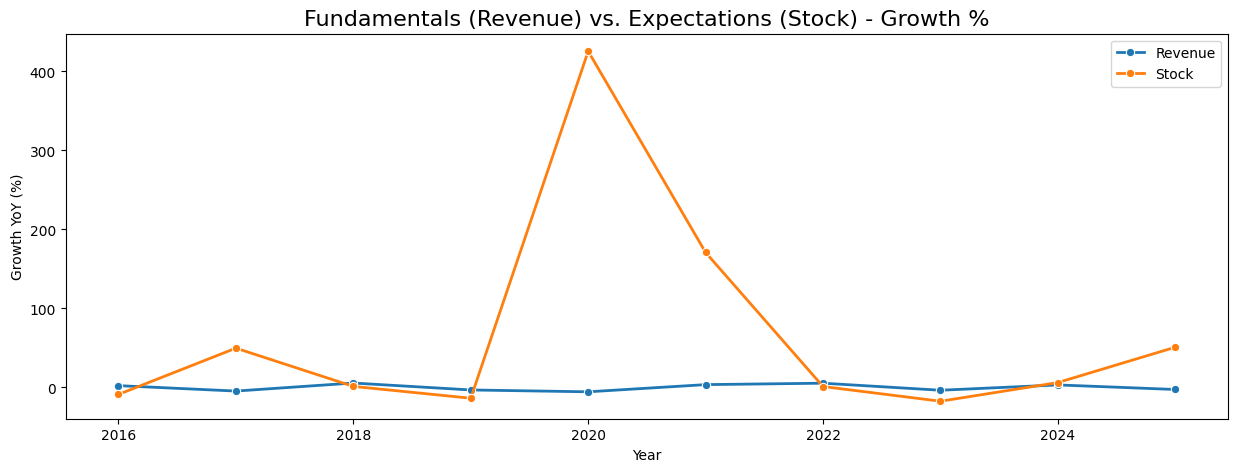

In [104]:
# Normalization by increase rate
# (pct.change - Calculates the percentage change from one line to another)
df_combined_yearly['Revenue_Growth_%'] = df_combined_yearly['Revenue_y'].pct_change() * 100
df_combined_yearly['Stock_Price_Growth_%'] = df_combined_yearly['Close_y'].pct_change() * 100

plt.figure(figsize=(15,5))

sns.lineplot(
    data=df_combined_yearly,
    x=df_combined_yearly.index,
    y='Revenue_Growth_%',
    linewidth=2, 
    marker='o',
    label='Revenue'
)
sns.lineplot(
    data=df_combined_yearly,
    x=df_combined_yearly.index,
    y='Stock_Price_Growth_%',
    linewidth=2, 
    marker='o',
    label='Stock'
)

plt.title('Fundamentals (Revenue) vs. Expectations (Stock) - Growth %', fontsize=16)
plt.ylabel('Growth YoY (%)')
plt.xlabel('Year')
plt.legend()
plt.show()